In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
x_data = np.linspace(0,10,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [8]:
noise.shape

(1000000,)

In [9]:
y_true = (0.5)*x_data + 5 + noise

In [13]:
x_df = pd.DataFrame(data = x_data,columns = ['X Data'])
y_df = pd.DataFrame(data = y_true,columns = ['y'])

In [18]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [19]:
my_data.head()

,X Data,y
0,0.00000,5.271619
1,0.00001,5.553318
2,0.00002,3.723957
3,0.00003,4.521332
4,0.00004,3.789859


## Plotting small sample

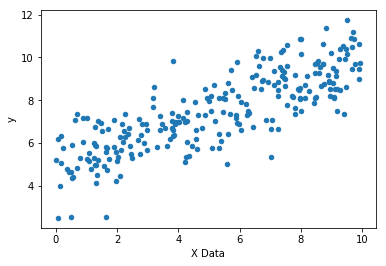

In [23]:
my_data.sample(250).plot(kind = 'scatter',x = 'X Data',y = 'y')

In [24]:
batch_size = 8

In [31]:
m = tf.Variable(np.random.randn(1))

In [32]:
b = tf.Variable(np.random.randn(1))

In [37]:
xph = tf.placeholder(tf.float64,[batch_size])

In [38]:
yph = tf.placeholder(tf.float64,[batch_size])

In [39]:
y_model = m*xph + b

In [40]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [42]:
train = optimizer.minimize(error)

In [43]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
        
    model_m,model_b = sess.run([m,b])

In [46]:
print(model_m)

[0.51522344]


In [47]:
print(model_b)

[4.85120602]


# Using TF.estimator api

In [49]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [51]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Dell\\AppData\\Local\\Temp\\tmpn_fu99b_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002525DDE6080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size = 0.3,random_state = 101)

In [57]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8, num_epochs = None,shuffle = True)

In [58]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8, num_epochs = 1000,shuffle = False)

In [59]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size = 8, num_epochs = 1000,shuffle = False)

In [61]:
estimator.train(input_fn = input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Dell\AppData\Local\Temp\tmpn_fu99b_\model.ckpt-100
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\Dell\AppData\Local\Temp\tmpn_fu99b_\model.ckpt.
INFO:tensorflow:loss = 17.50493, step = 101
INFO:tensorflow:global_step/sec: 1078.16
INFO:tensorflow:loss = 36.356262, step = 201 (0.095 sec)
INFO:tensorflow:global_step/sec: 1299.17
INFO:tensorflow:loss = 14.379041, step = 301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1643.74
INFO:tensorflow:loss = 6.2382746, step = 401 (0.060 sec)
INFO:tensorflow:global_step/sec: 1237.86
INFO:tensorflow:loss